In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
img = image.load_img("basedata/training/helmet/16.jpg")

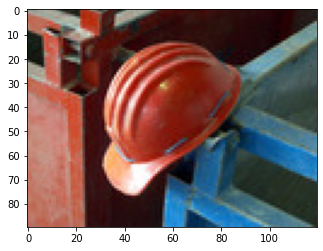

In [24]:
plt.imshow(img)

In [25]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [38]:
train_dataset = train.flow_from_directory('basedata/training/',
                                         target_size = (200,200),
                                         batch_size = 6,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('basedata/validation/',
                                         target_size = (200,200),
                                         batch_size = 6,
                                         class_mode = 'binary')

Found 831 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [39]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
    
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                           
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2)   ,
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [40]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [41]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 10,
                     epochs = 50,
                     validation_data = validation_dataset)

Epoch 1/50
10/10 [==============================] - 3s 279ms/step - loss: 5.1744 - accuracy: 0.5167 - val_loss: 0.9408 - val_accuracy: 0.4688
Epoch 2/50
10/10 [==============================] - 3s 256ms/step - loss: 0.5860 - accuracy: 0.7167 - val_loss: 1.3430 - val_accuracy: 0.4688
Epoch 3/50
10/10 [==============================] - 3s 257ms/step - loss: 0.6732 - accuracy: 0.6667 - val_loss: 1.7381 - val_accuracy: 0.4688
Epoch 4/50
10/10 [==============================] - 3s 254ms/step - loss: 0.5805 - accuracy: 0.7167 - val_loss: 0.7777 - val_accuracy: 0.4688
Epoch 5/50
10/10 [==============================] - 3s 252ms/step - loss: 0.5740 - accuracy: 0.7000 - val_loss: 0.7060 - val_accuracy: 0.6250
Epoch 6/50
10/10 [==============================] - 3s 254ms/step - loss: 0.8784 - accuracy: 0.7167 - val_loss: 0.7863 - val_accuracy: 0.4688
Epoch 7/50
10/10 [==============================] - 3s 253ms/step - loss: 0.5915 - accuracy: 0.6667 - val_loss: 0.6794 - val_accuracy: 0.5625
Epoch 

In [42]:
validation_dataset.class_indices

{'helmet': 0, 'jacket': 1}

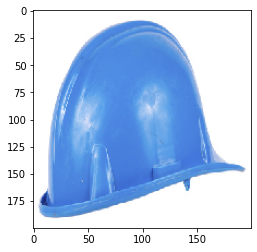

1/1 [==============================] - 0s 39ms/step
Helmet


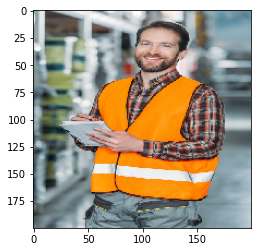

1/1 [==============================] - 0s 40ms/step
Life Jacket


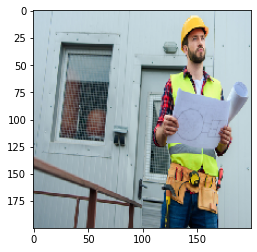

1/1 [==============================] - 0s 38ms/step
Life Jacket


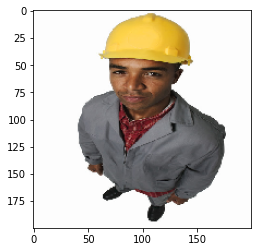

1/1 [==============================] - 0s 40ms/step
Helmet


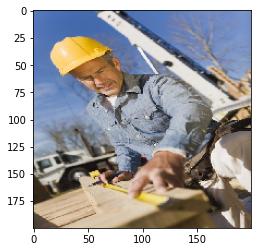

1/1 [==============================] - 0s 50ms/step
Helmet


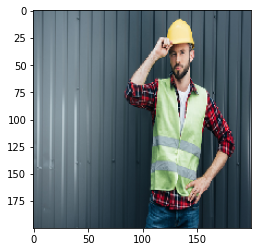

1/1 [==============================] - 0s 28ms/step
Life Jacket


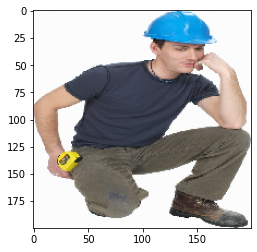

1/1 [==============================] - 0s 30ms/step
Helmet


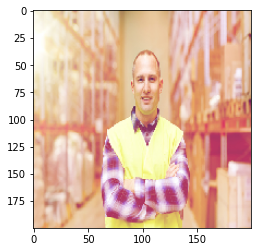

1/1 [==============================] - 0s 30ms/step
Life Jacket


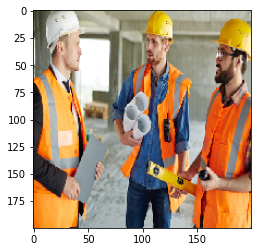

1/1 [==============================] - 0s 50ms/step
Helmet


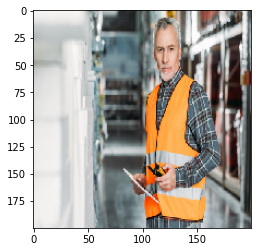

1/1 [==============================] - 0s 30ms/step
Life Jacket


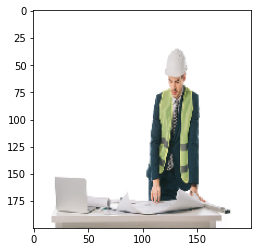

1/1 [==============================] - 0s 40ms/step
Helmet


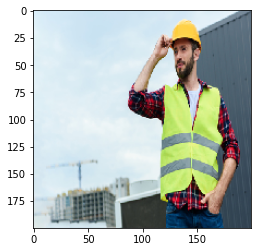

1/1 [==============================] - 0s 50ms/step
Life Jacket


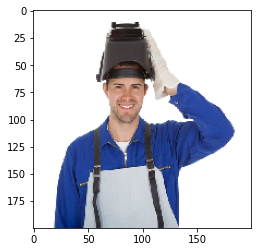

1/1 [==============================] - 0s 29ms/step
Helmet


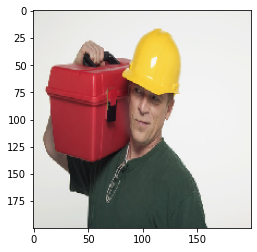

1/1 [==============================] - 0s 31ms/step
Helmet


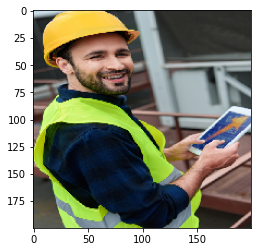

1/1 [==============================] - 0s 30ms/step
Life Jacket


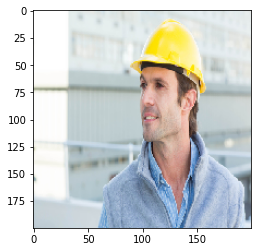

1/1 [==============================] - 0s 35ms/step
Helmet


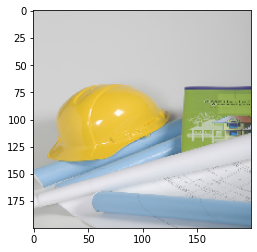

1/1 [==============================] - 0s 29ms/step
Helmet


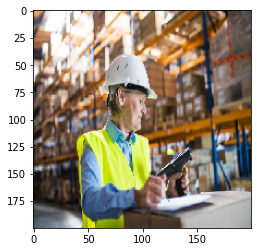

1/1 [==============================] - 0s 40ms/step
Life Jacket


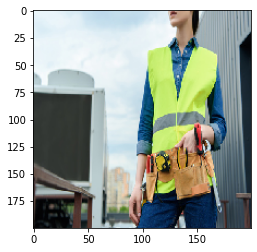

1/1 [==============================] - 0s 24ms/step
Life Jacket


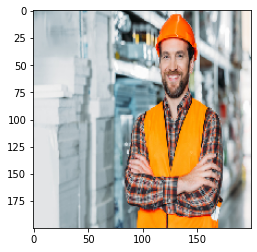

1/1 [==============================] - 0s 32ms/step
Life Jacket


In [44]:
dir_path = 'basedata/testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Helmet")
    elif val==1:
        print("Life Jacket")
    